<font size="6"><b>Unsupervised Learning : K-means Clustering</b></font>

Table of Contents
<div id="toc"></div>

# 1. Supervised vs. Unsupervised Learning
- Supervised: building a model from labeled data
- Unsupervised: clustering from unlabeled data

<font size='4'>Supervised Learning</font>

<br>
<img src="./image_files/01.bmp", width=400>
<br>

$$ \begin{array}{Icr}
\{x^{(1)},x^{(2)},\cdots,x^{(m)}\}\\
\{y^{(1)},y^{(2)},\cdots,y^{(m)}\}
\end{array} \quad \Rightarrow \quad \text{Classification}$$

<font size='4'>Unsupervised Learning</font>

- Data clustering is an unsupervised learning problem

- Given: 
 - $N$ unlabeled examples $\{x_1,\cdots, x_m\}$
 - the number of partitions $k$


- Goal: group the examples into $k$ partitions


<br>
<img src="./image_files/02.bmp", width = 400>
<br>

$$\{x^{(1)},x^{(2)},\cdots,x^{(m)}\} \;\; \Rightarrow \text{Clustering}$$

- the only information clustering uses is the similarity between examples

- clustering groups examples based of their mutual similarities

- A good clustering is one that achieves:
    - high within-cluster similarity
    - low inter-cluster similarity


# 2. K-means

## 2.1. Algorithm
<br>
<font size='4'><b>1) K-means Clustering Step - Initialization</b></font>

Input:
- $K$: the number of clusters
- Training set $\{x^{(1)},x^{(2)},\cdots,x^{(m)}\}$

Randomly initialized anywhere in $\mathbb{R}^n$
<br>
<img src="./image_files/003.png", width = 600>
<br>

<font size='4'><b>2) K-means Clustering Step - Iteration</b></font>
<br>
<img src="./image_files/004.png", width = 600>

Repeat until convergence (a possible convergence criteria: cluster centers do not change anymore)

<font size='4'><b>3) K-means Clustering Step - Output</b></font>

Output: model
- $c$ (label): index (1 to $k$) of cluster centroid $\{c^{(1)},c^{(2)},\cdots,c^{(m)}\}$
- $\mu$ : averages (mean) of points assigned to cluster $\{\mu_1,\mu_2,\cdots,\mu_k\}$

<br>
<img src="./image_files/005.png", width=400>
<br>

## 2.2. Animated illustration
<img src="./image_files/kmeans01.gif", width="450">

## 2.3. Summary: K-means Algorithm


$
\,\text{Randomly initialize } K \,\text{cluster centroids } \mu_1,\mu_2,\cdots,\mu_K \in \mathbb{R}^n$

$
\begin{align*}
\text{Repeat}&\{ \\
&\text{for $i=1$ to $m$} \\    
&\quad \text{$c^{(i)}$ := index (from 1 to $K$) of cluster centroid closet to $x^{(i)}$} \\     
&\text{for $k=1$ to $K$} \\
&\quad \text{$\mu_k$ := average (mean) of points assigned to cluster $k$} \\
&\}
\end{align*}
$

## 2.4. K-means Optimization Point of View

- $c^{(i)}$= index of cluster (1,2,...,$K$) to which example $x^{(i)}$ is currently assigned
- $\mu_k$= cluster centroid $k$ ($\mu_k \in \mathbb{R}^n$)
- $\mu_{c^{(i)}}$= cluster centroid of cluster to which example $x^{(i)}$ has been assigned



- Optimization objective:

$$ J(c^{(1)},\cdots,c^{(m)},\mu_1,\cdots,\mu_K) = \frac{1}{m}\sum\limits_{i=1}^m \lVert x^{(i)}-\mu_{c^{(i)}}\rVert^2$$

$$ \min\limits_{c^{(1)},\cdots,c^{(m)}, \; \mu_1,\cdots,\mu_K} J(c^{(1)},\cdots,c^{(m)},\mu_1,\cdots,\mu_K)$$

## K-means: Initialization issues


- k-means is extremely senstitive to cluster center initialization


- Bad initialization can lead to
    - Poor convergence speed
    - Bad overall clustering


- Safeguarding measures:
    - Choose first center as one of the examples, second which is the farthest from the first, third which is the farthest from both, and so on.
    - Try multiple initialization and choose the best result
    
## K-means: Limitations

- Make <font color='red'>hard assignments</font> of points to clusters
    - A point either completely belongs to a cluster or not belongs at all
    - No notion of a <font color='green'>soft assignment</font> (_i.e._, probability of being assigned to each cluster)
    - Gaussian mixture model (we will study later) and Fuzzy K-means allow soft assignments


- Sensitive to outlier examples (such example can affect the mean by a lot)
    - <font color='green'>K-medians</font> algorithm is a more robust alternative for data with outliers


- Works well only for round shaped, and of roughly equal sizes/density cluster


- Does badly if the cluster have non-convex shapes
    - Spectral clustering (we will study later) and Kernelized K-means can be an alternative


- Non-convex/non-round-shaped cluster: standard K-means fails !
<img src="./image_files/non-convex.png", width = 600>


- Clusters with different densities
<img src="./image_files/different_densities.png", width = 600>


# 3. Matlab code

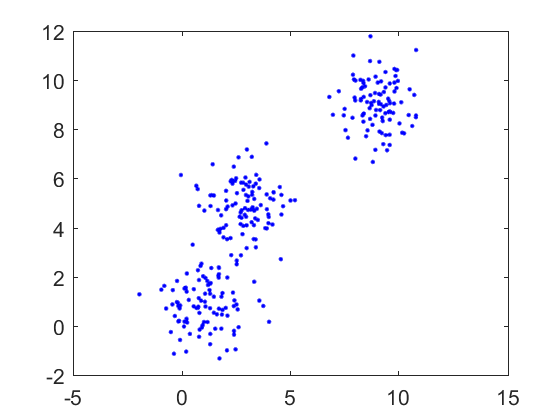

In [2]:
% data generation

group1 = mvnrnd([1 1],eye(2),100);
group2 = mvnrnd([3 5],eye(2),100);
group3 = mvnrnd([9 9],eye(2),100);
data = [group1; group2; group3]';

plot(data(1,:),data(2,:),'b.')

## 3.1. K-means clustering

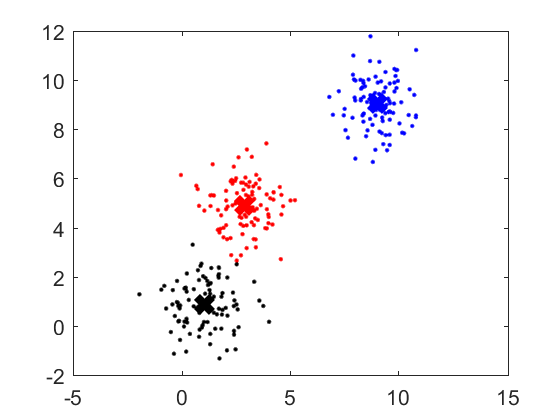

In [3]:
% Number of cluster and data
ncluster = 3;
ndata = 300;


r = randi([1 ndata],ncluster,1);
mu = data(:,r);
pre_mu = mu;
% Run K-means
for j = 1:500     
    % Cluster assignment
    distance = [];
    for k = 1:ncluster
        distance = [distance; sum((data - repmat(mu(:,k),1,ndata)).^2) ];            
    end
    [~,c] = min(distance,[],1);

    % Move centroid
    for k = 1:ncluster
        mu(:,k) = mean(data(:,c == k),2);
    end

    if sum(sum(abs(pre_mu-mu))) < 10^(-5)
        break;
    else
        pre_mu = mu;
    end
end




% Plot the result
figure(1); hold on
plot(data(1,c == 1),data(2,c == 1),'r.'); hold on
plot(mu(1,1),mu(2,1),'rx','LineWidth',4,'MarkerSize',10)
plot(data(1,c == 2),data(2,c == 2),'b.');
plot(mu(1,2),mu(2,2),'bx','LineWidth',4,'MarkerSize',10)
plot(data(1,c == 3),data(2,c == 3),'k.');
plot(mu(1,3),mu(2,3),'kx','LineWidth',4,'MarkerSize',10)
box on

## 3.2. Choosing the Number of Clusters

- Idea: when adding another cluster does not give much better modeling of the data

- One way to select $K$ for the K-means algorithm is to try different values of $K$, plot the K-means objective versus $K$, and look at the '<font color='green'>elbow-point</font>' in the plot

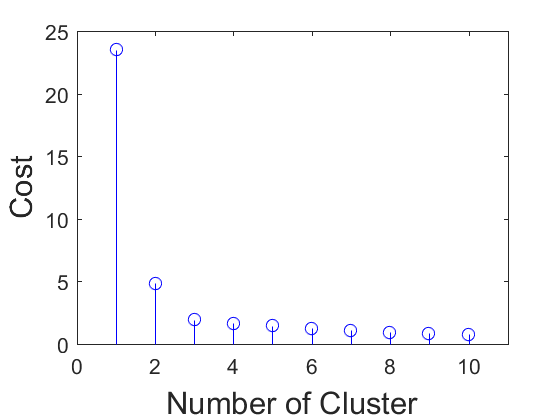

In [6]:
Q = [];
for K = 1:10
   
    % Number of cluster and data
    ncluster = K;
    ndata = 300;

    % Store c,mu and cost for every initialization 
    C = [];
    J = [];
    MU = [];

    % Randomly initialize 100 times
    for i = 1:100
        r = randi([1 ndata],ncluster,1);
        mu = data(:,r);
        
        pre_mu = mu;
        
        % Run K-means
        for j = 1:50    
            % Cluster assignment
            distance = [];
            for k = 1:ncluster
                distance = [distance; sum((data - repmat(mu(:,k),1,ndata)).^2) ];            
            end
            [~,c] = min(distance,[],1);

            % Move centroid
            for k = 1:ncluster
                mu(:,k) = mean(data(:,c == k),2);
            end
            
            if sum(sum(abs(pre_mu-mu))) < 10^(-5)
                break;
            else
                pre_mu = mu;
            end
        end

        % Compute cost
        cost = 0;
        for j = 1:ncluster
            cost = cost + sum(sum( (data(:,c == j) - repmat(mu(:,j),1,sum(c == j)) ).^2));
        end
        cost = cost/ndata;

        % Find minimum cost and corresponding mu and c
        if i == 1
            C = c;
            J = cost;
            MU = mu;
        elseif cost < J
            J = cost;
            C = c;
            MU = mu;
        end

    end

    % Find minimum cost and corresponding mu and c
    Q = [Q J];


end

% Plot the cost
figure(3); clf;
stem(Q,'b'); hold on
xlim([0 11])
xlabel('Number of Cluster','FontSize',15)
ylabel('Cost','FontSize',15)


# Homework Assignment

Image compression
- Use only 16 colors

<table>
<tr>
<td>
<img src="image_files/06.bmp",width="300">
</td>
<td>
<img src="image_files/07.bmp",width="300">
</td>
</tr>
</table>

In [6]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>